A kinematically unbiased, all-sky search for nearby, young, low-mass stars
* Binks+2020:https://ui.adsabs.harvard.edu/abs/2020MNRAS.491..215B/abstract
* See also https://iopscience.iop.org/article/10.3847/2515-5172/ab9e03

https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/MNRAS/491/215

In [21]:
import chronos as cr

key = cr.cluster.CATALOG_DICT["Binks2020"]
tabs = cr.get_vizier_tables(key, row_limit=-1)
tabs

{'J/MNRAS/491/215/table1': 'Spectral-types, photometry and X-ray data for CYS', 'J/MNRAS/491/215/table2': 'Sub observed spectroscopically', 'J/MNRAS/491/215/table3': 'H{alpha} and Li EW data', 'J/MNRAS/491/215/table4': 'Gaia DR2 data for CPMCs', 'J/MNRAS/491/215/table5': 'Astrometry and kinematics for CYS'}


TableList with 5 tables:
	'0:J/MNRAS/491/215/table1' with 16 column(s) and 146 row(s) 
	'1:J/MNRAS/491/215/table2' with 17 column(s) and 28 row(s) 
	'2:J/MNRAS/491/215/table3' with 11 column(s) and 43 row(s) 
	'3:J/MNRAS/491/215/table4' with 18 column(s) and 42 row(s) 
	'4:J/MNRAS/491/215/table5' with 31 column(s) and 146 row(s) 

In [5]:
tabs = cr.get_vizier_tables(key, row_limit=-1, tab_index=0)
df

,_2MASS,SpTypec,SpTyper,NUV,e_NUV,Gmag,BPmag,RPmag,Ksmag,e_Ksmag,FX_FBol,NUVdiff,SName,SimbadName,_RA,_DE
0,00044817-4959504,K3.1,,18.992001,0.056,10.8804,11.4445,10.1998,8.768,0.021,NaN,0.04,2MASS J0004-4959,2MASS J00044817-4959504,1.20071,-49.99731
1,00092179+0038065,K4.0,K4Ve,18.290001,0.052,11.0253,11.6454,10.3281,8.711,0.019,-3.21,-1.54,2MASS J0009+0038,2MASS J00092179+0038065,2.34080,0.63516
2,00475278-3245205,K3.7,K2Ve,16.695999,0.024,10.1600,10.7268,9.4748,7.899,0.029,-3.10,-5.79,2MASS J0047-3245,2MASS J00475278-3245205,11.96986,-32.75572
3,00524693+0948123,K1.6,K0,14.659000,0.008,8.3148,8.7536,7.7503,6.476,0.027,-4.77,-0.76,2MASS J0052+0948,2MASS J00524693+0948123,13.19552,9.80346
4,01011333-4517578,K3.2,K0V,15.674000,0.012,9.6079,9.9796,8.9547,7.501,0.026,NaN,-2.04,2MASS J0101-4517,2MASS J01011333-4517578,15.30569,-45.29961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,23231433-3730559,K1.7,K1/2(III),15.798000,0.013,9.4833,9.9551,8.9549,7.635,0.029,-3.67,-0.91,2MASS J2323-3730,2MASS J23231433-3730559,350.80969,-37.51557
142,23281562-2541596,K3.2,,18.173000,0.041,10.8438,11.3901,10.1805,8.735,0.023,NaN,-0.62,2MASS J2328-2541,2MASS J23281562-2541596,352.06510,-25.69990
143,23300771-1717017,K3.1,K0V(e),16.181999,0.010,10.2468,10.7403,9.6109,8.162,0.031,-3.16,-2.08,2MASS J2330-1717,2MASS J23300771-1717017,352.53214,-17.28385
144,23323085-1215513,M1.4,M0Ve,17.889999,0.034,9.8182,10.8712,8.8229,6.569,0.018,-3.16,-4.03,2MASS J2332-1215,2MASS J23323085-1215513,353.12859,-12.26430


In [9]:
df['SimbadName'].to_csv("../../tql/tests/Binks2020/binks2020.txt",
                  header=False,
                index=False
         )

## closer look at individual targets

No obvious transits in Binks+2020

In [1]:
import lightkurve as lk
lk.__version__

'2.0.9'

In [75]:
r = lk.search_targetpixelfile("TIC 21413209") #clear rotation, 
r

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 21,2020,SPOC,120,21413209,0.0
1,TESS Sector 21,2020,TESS-SPOC,1800,21413209,0.0


In [76]:
tpf = r[0].download()

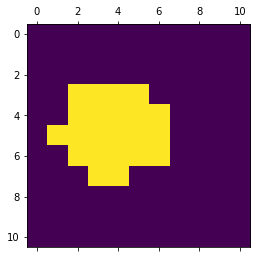

In [77]:
import matplotlib.pyplot as pl
pl.matshow(tpf.pipeline_mask)

In [78]:
tpf.interact(aperture_mask='pipeline')

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

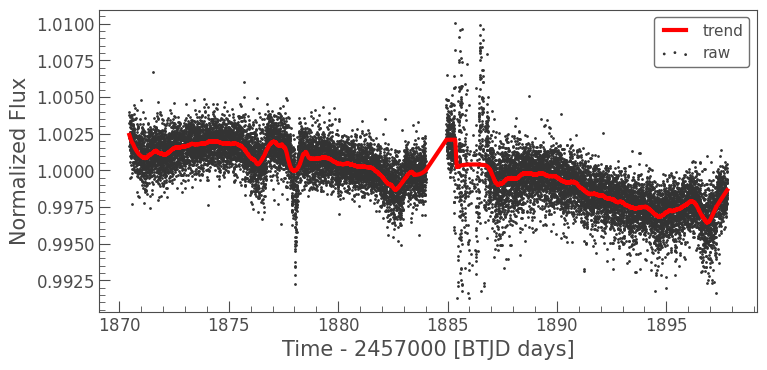

In [86]:
lc = tpf.to_lightcurve().normalize().remove_outliers()
flat, trend = lc.flatten(window_length=701, return_trend=True, break_tolerance=50)
ax = lc.scatter(label='raw')
trend.plot(ax=ax, c='r', lw=3, label='trend')

In [87]:
flat.interact_bls()